# Анализ производительности merge sort
Была реализована сортировка слиянием с использованием openmp tasks

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as matplotlib
import numpy as np

Если размер массива не равен степени 2, то он расширяется до ближайшей степени двойки.

Number of threads: 12
Linear threashhold: 1
Массивы с мусором сортируются быстрее

(11, 2)
[[    100      15]
 [   1000       2]
 [  10000      37]
 [ 100000     283]
 [ 200000     566]
 [ 300000    1139]
 [ 400000    1163]
 [ 500000    1153]
 [ 600000    2488]
 [1000000    2471]
 [1100000    4514]]


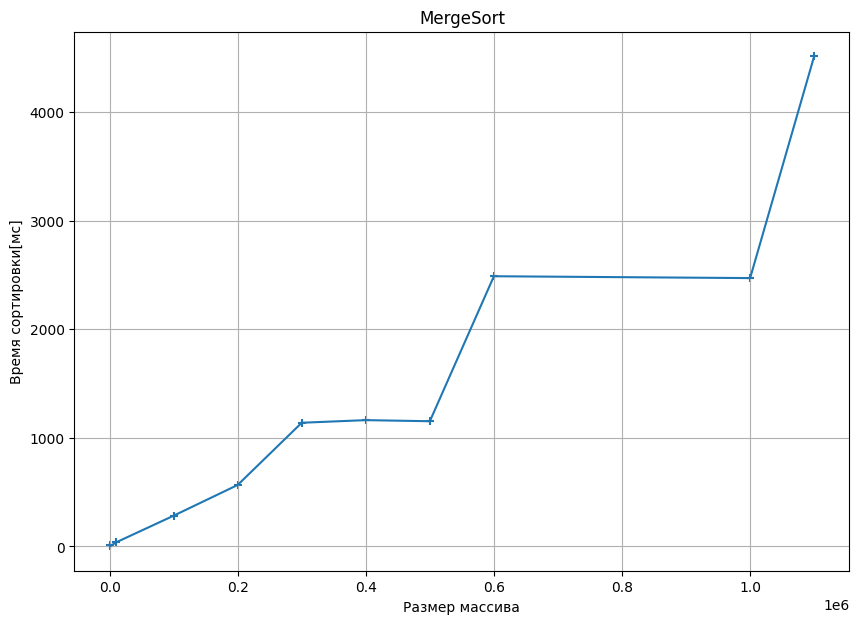

In [2]:
def process_data(data):
  data_arr = np.array(data)
  data_arr = data_arr.T
  print(data_arr.shape)
  return data_arr[data_arr[:, 0].argsort()]

raw_data = np.loadtxt("Size-time", dtype=np.int64, unpack=True)
data = process_data(np.matrix(raw_data))
print(data)
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(data[:, 0], data[:, 1])  
ax.scatter(data[:, 0], data[:, 1], marker="+")
ax.set_xlabel('Размер массива')
ax.set_ylabel('Время сортировки[мс]')
ax.set_title('MergeSort')
ax.grid()
plt.show()

Потом алгоритм был распараллелен. В этом случае используется чистый merge-sort, поэтому ускорение максимум в 2 раза.

Size: 500000
Linear threashold: 1

(7, 2)
[[1.         1.        ]
 [2.         1.57821406]
 [3.         1.65142478]
 [4.         2.06120761]
 [5.         2.33552015]
 [6.         2.33333333]
 [8.         2.34430856]]


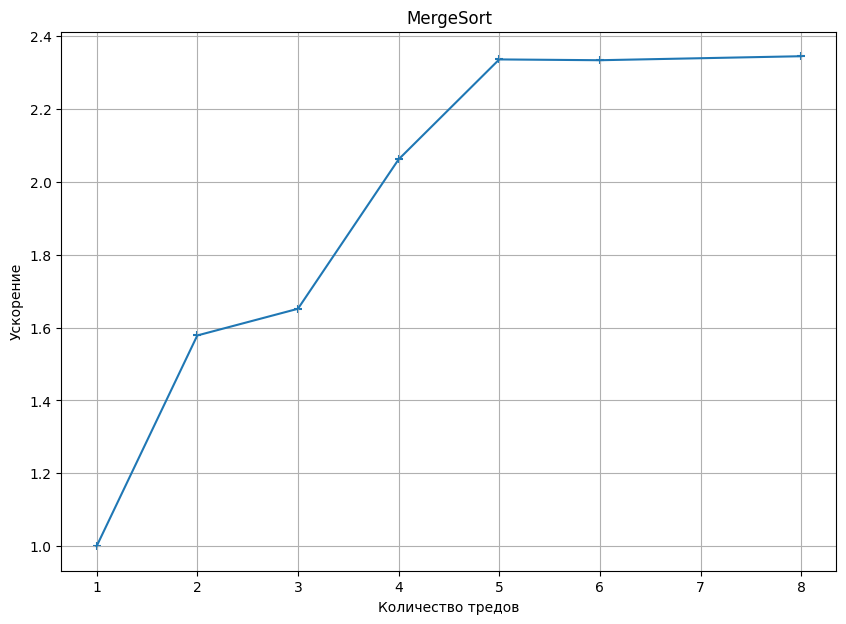

In [3]:
def process_data(data):
  data_arr = np.array(data)
  data_arr = data_arr.T
  print(data_arr.shape)
  sorted_arr = data_arr[data_arr[:, 0].argsort()]
  sorted_arr[:, 1] = sorted_arr[0, 1] / sorted_arr[:, 1]
  return sorted_arr

raw_data = np.loadtxt("Threads-time", dtype=float, unpack=True)
data = process_data(np.matrix(raw_data))
print(data)
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(data[:, 0], data[:, 1])  
ax.scatter(data[:, 0], data[:, 1], marker="+")
ax.set_xlabel('Количество тредов')
ax.set_ylabel('Ускорение')
ax.set_title('MergeSort')
ax.grid()
plt.show()

Далее были протестиролваны разные размеры массива при котором начинается сортировка в одном потоке.

Size: 500000
Number of threads: 12

(6, 2)
[[  1.           1.        ]
 [ 16.           2.8817734 ]
 [ 32.           2.90322581]
 [ 64.           3.14516129]
 [128.           3.40116279]
 [256.           3.41107872]]


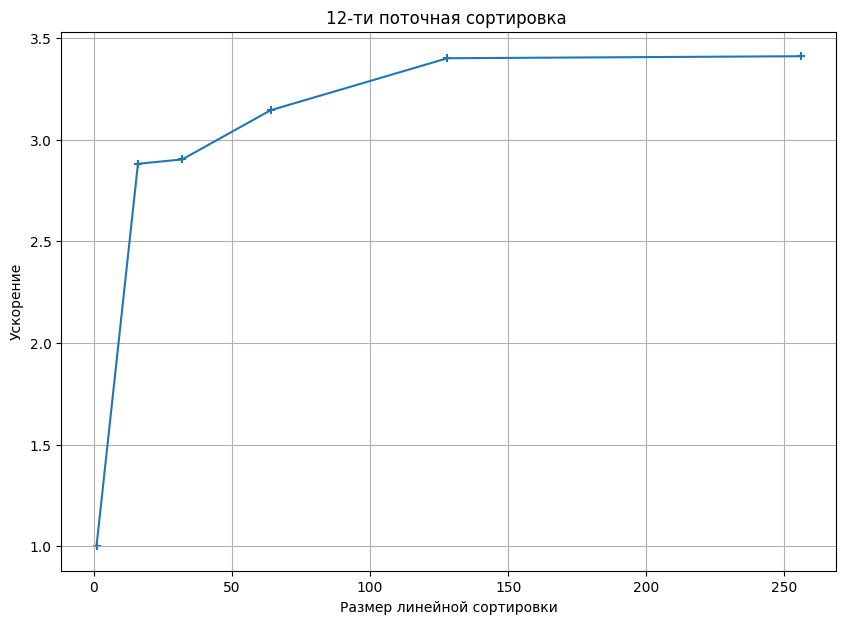

In [5]:
def process_data(data):
  data_arr = np.array(data)
  data_arr = data_arr.T
  print(data_arr.shape)
  sorted_arr = data_arr[data_arr[:, 0].argsort()]
  sorted_arr[:, 1] = sorted_arr[0, 1] / sorted_arr[:, 1]
  return sorted_arr

raw_data = np.loadtxt("Threashold-time-12", dtype=float, unpack=True)
data = process_data(np.matrix(raw_data))
print(data)
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(data[:, 0], data[:, 1])  
ax.scatter(data[:, 0], data[:, 1], marker="+")
ax.set_xlabel('Размер линейной сортировки')
ax.set_ylabel('Ускорение')
ax.set_title('12-ти поточная сортировка ')
ax.grid()
plt.show()

Аналогично для однопоточной.

Size: 500000
Number of threads: 1

(5, 2)
[[  1.           1.        ]
 [ 16.           1.85554728]
 [ 32.           1.89794364]
 [ 64.           2.08361204]
 [128.           2.18980668]]


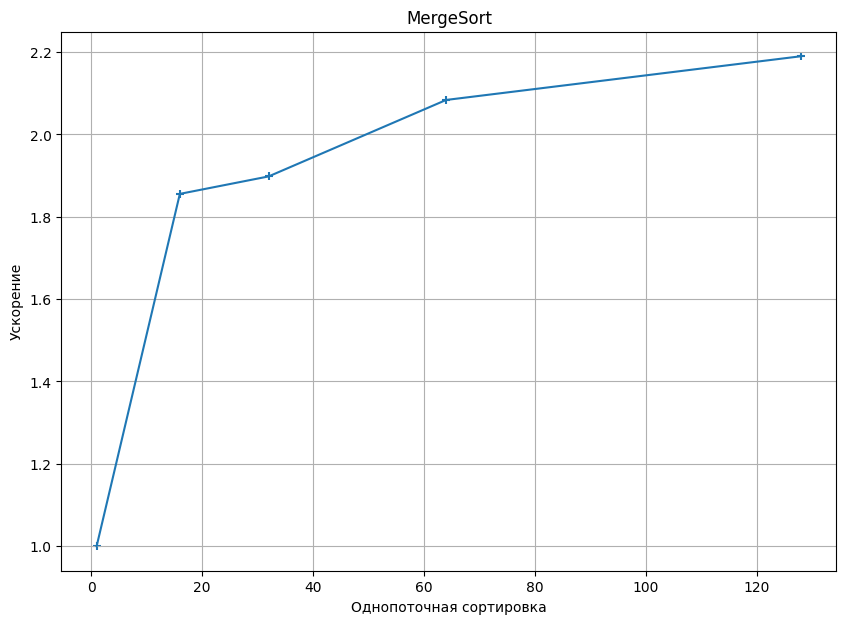

In [ ]:
def process_data(data):
  data_arr = np.array(data)
  data_arr = data_arr.T
  print(data_arr.shape)
  sorted_arr = data_arr[data_arr[:, 0].argsort()]
  sorted_arr[:, 1] = sorted_arr[0, 1] / sorted_arr[:, 1]
  return sorted_arr

raw_data = np.loadtxt("Threashold-time-1", dtype=float, unpack=True)
data = process_data(np.matrix(raw_data))
print(data)
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(data[:, 0], data[:, 1])  
ax.scatter(data[:, 0], data[:, 1], marker="+")
ax.set_xlabel('Размер линейной сортировки')
ax.set_ylabel('Ускорение')
ax.set_title('Ускорение относительно чистого merge-sort')
ax.grid()
plt.show()

Ускорение для оптимизированных параметров.

Size: 500000
LinearThreshold: 128

(5, 2)
[[ 1.          1.        ]
 [ 2.          1.51742627]
 [ 4.          2.277666  ]
 [ 8.          2.50442478]
 [12.          3.2716763 ]]


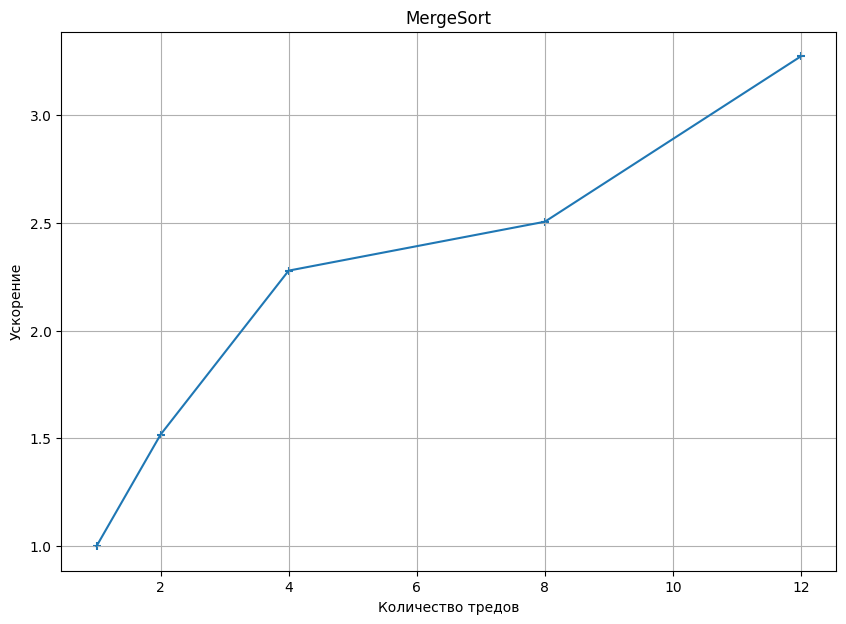

In [ ]:
def process_data(data):
  data_arr = np.array(data)
  data_arr = data_arr.T
  print(data_arr.shape)
  sorted_arr = data_arr[data_arr[:, 0].argsort()]
  sorted_arr[:, 1] = sorted_arr[0, 1] / sorted_arr[:, 1]
  return sorted_arr

raw_data = np.loadtxt("Threads-optimal-time", dtype=float, unpack=True)
data = process_data(np.matrix(raw_data))
print(data)
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(data[:, 0], data[:, 1])  
ax.scatter(data[:, 0], data[:, 1], marker="+")
ax.set_xlabel('Количество тредов')
ax.set_ylabel('Ускорение')
ax.set_title('MergeSort')
ax.grid()
plt.show()